# Classification

[Load and return the iris dataset (classification)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

@ Iris Data

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal(꽃잎) length in cm 
2. sepal(꽃잎) width in cm 
3. petal(꽃받침) length in cm 
4. petal(꽃받침) width in cm 

Class information:

-- Iris Setosa (부채붓꽃)
-- Iris Versicolour (...) 
-- Iris Virginica (...)

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# Only using sepal information
x = iris.data[:, :2]

# Setosa v.s. Not Setosa
y = (iris.target >= 1).astype(int)

x.shape, y.shape

((150, 2), (150,))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

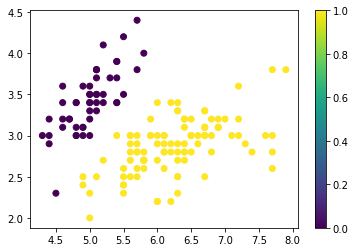

In [4]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.colorbar()
plt.show()

### Split Data: Train data, Validation Data

In [5]:
import numpy as np

In [6]:
train_len = 100
train_idxs = np.random.choice(len(x), train_len, replace=False)
train_x = x[train_idxs]
train_y = y[train_idxs]

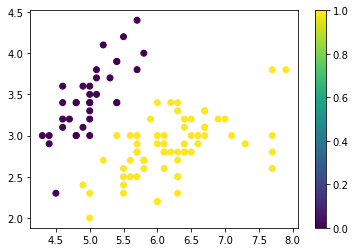

In [7]:
plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y)
plt.colorbar()
plt.show()

In [8]:
val_idxs = [idx for idx in range(len(x)) if idx not in train_idxs]
val_x = x[val_idxs]
val_y = y[val_idxs]

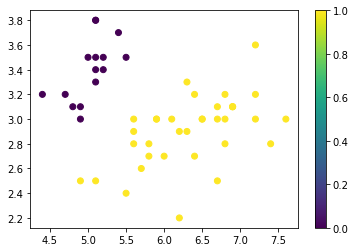

In [9]:
plt.scatter(val_x[:, 0], val_x[:, 1], c=val_y)
plt.colorbar()
plt.show()

### Set Models

#### Linear Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model_lr = LogisticRegression(fit_intercept=True,
                              solver='lbfgs',
                              random_state=0) # Loss function is fixed to BCE.

#### DecisionTree

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
model_dt = DecisionTreeClassifier(criterion='gini',
                                  splitter='best', # {“best”, “random”}
                                  max_depth=10,
                                  random_state=0)

#### SVC

In [14]:
from sklearn.svm import SVC

In [15]:
model_svc = SVC(C=1.0, kernel='rbf', gamma='scale')

### Train and Validate

In [16]:
models = [model_lr, model_dt, model_svc]

In [17]:
def accuracy(pre, y):
    return sum(pre==y)/len(y)

#### Train

In [18]:
for model in models:
    model.fit(train_x, train_y)
    pre = model.predict(train_x)
    
    acc = accuracy(pre, train_y)
    
    print(model, acc)

LogisticRegression(random_state=0) 1.0
DecisionTreeClassifier(max_depth=10, random_state=0) 1.0
SVC() 1.0


#### Validate

In [19]:
for model in models:
#     model.fit(val_x, val_y)
    pre = model.predict(val_x)
    
    acc = accuracy(pre, val_y)
    
    print(model, acc)

LogisticRegression(random_state=0) 1.0
DecisionTreeClassifier(max_depth=10, random_state=0) 0.98
SVC() 1.0


#### Explain

In [20]:
h = .02
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

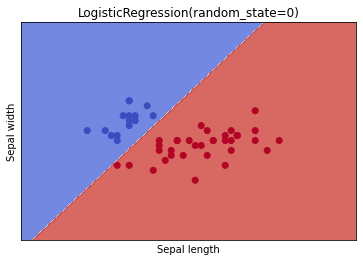

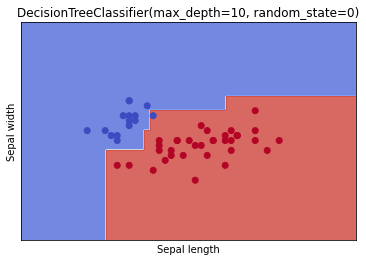

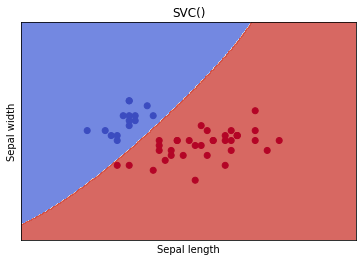

In [21]:
for model in models:
    pre = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pre = pre.reshape(xx.shape)
    plt.contourf(xx, yy, pre, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(val_x[:, 0], val_x[:, 1], c=val_y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(model)
    plt.show()

### Select Model

In [22]:
model_best = model_lr